# PCA

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [52]:
df = pd.read_csv('Wine.csv')
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [53]:
print(f'{df.head()}')
print('---------------------------------------------------')
print(f'{df.describe()}')
print('---------------------------------------------------')
print(f'{df.info()}')
print('---------------------------------------------------')
print(f'{df.columns}')

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     105

### Splitting the dataset into the Training set and Test set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Feature Scaling

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Applying PCA

In [56]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
exp_var = pca.explained_variance_ratio_

In [57]:
exp_var

array([0.36884109, 0.19318394])

### Fitting Logistic Regression to the Training set

In [58]:
classifier = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Predicting the Test set results

In [59]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 3, 2, 1, 2, 1, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

### Making the Confusion Matrix

In [60]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [61]:
accuracy = (cm[0][0]+cm[1][1]+cm[2][2])/(cm.sum())
print(f'Accuracy = {accuracy*100}%')

Accuracy = 97.22222222222221%


### Visualizing the Training set results

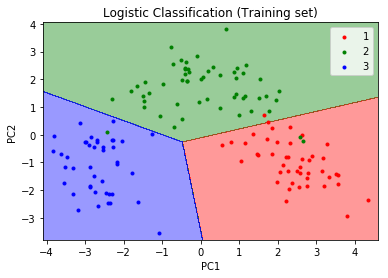

In [64]:
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g', 'b'][i], marker='.', label=j)

plt.title('Logistic Classification (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Visualizing the Test set results

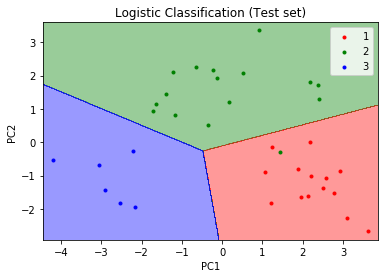

In [65]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - .25,
                               stop=X_set[:, 0].max() + .25, step=0.01),
                     np.arange(start=X_set[:, 1].min() - .25,
                               stop=X_set[:, 1].max() + .25, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array(
    [X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.4, cmap=ListedColormap(('red', 'green', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=['r', 'g', 'b'][i], marker='.', label=j)

plt.title('Logistic Classification (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()